In [2]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
from model.SEIR.SEIR import SEIR

## Data preparation

In [3]:
def readData(path):
    with open(path, "r") as f:
        json_data = json.load(f)
        data = pd.DataFrame(json_data["data"])
    return data

In [4]:
def show_plot(data, end_day, start_day=0):
    current_confirm = data.currentConfirmedCount.iloc[start_day:]
    plt.plot(current_confirm)
    plt.show()
    print("Date from %s to %s" % (data.loc[start_day, "dateId"], data.loc[end_day - 1, "dateId"]))

In [5]:
path = "../../dataset/data_xyz/provinceData/上海.json"
sh_data = readData(path)

path2 = "../../dataset/data_xyz/provinceData/广东.json"
gd_data = readData(path2)

path3 = "../../dataset/data_xyz/provinceData/西藏.json"
xz_data = readData(path3)

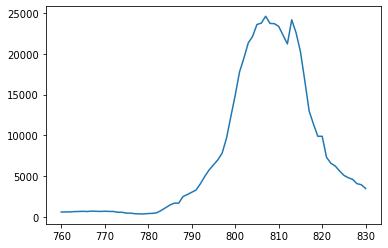

Date from 20220306 to 20220515


In [6]:
sh_start_day, sh_end = 760, sh_data.shape[0]
show_plot(sh_data, sh_end, sh_start_day)

## Prediction

In [7]:
def init_params(city,start_day=0, population_path="../../dataset/population7th.csv"):
    populations = pd.read_csv(population_path)
    # TODO:
    all_num = populations[populations.Province == city].iloc[0, 1] // 15

    I0_num = sh_data.loc[start_day, "currentConfirmedCount"]
    r0_num = sh_data.loc[start_day, "deadCount"] + sh_data.loc[start_day, "curedCount"]
    S0_num = all_num - I0_num - r0_num

    S0 = S0_num / all_num
    I0 = I0_num / all_num
    r0 = r0_num / all_num
    return all_num, S0_num, I0_num, r0_num, S0, I0, r0

In [19]:
def eval(pred, test):
    diff = np.abs(pred - test)
    return np.sum(diff)/ diff.shape[0]

In [20]:
def show_predict(data, all_num, end_day, start_day, S0, I0, mu, beta, gamma):
    seir = SEIR(S0=S0, I0=I0, mu=mu, beta=beta, gamma=gamma)

    pred = seir.predict(np.arange(0, end_day - start_day))

    pre_infected = pred[:, 2] * all_num
    gt_infected = data.loc[start_day:end_day - 1, "currentConfirmedCount"].reset_index(drop=True)
    plt.plot(pre_infected, '-g', label="predict")
    plt.plot(gt_infected, '-r', label="actual")
    plt.show()
    print("Average error:",eval(pre_infected, gt_infected))
    return seir, pred

#### SH

In [21]:
pop = "../../dataset/population7th.csv"
pop_data = pd.read_csv(pop)
total_pop = pop_data.iloc[0, 1]
average_pop = total_pop / pop_data.shape[0]
pop_scale = 24 * 15
average_pop

40336534.97142857

In [22]:
sh = "上海"
all_sh, S0_num_sh, I0_num_sh, r0_num_sh, S0, I0, r0 = init_params(sh, start_day=sh_start_day)
print(S0_num_sh, I0_num_sh, r0_num_sh)
print(S0, I0, r0)
average_pop / all_sh

1653497 582 3980
0.9972485900682666 0.00035101284091820616 0.002400397090815224


24.327563115322537

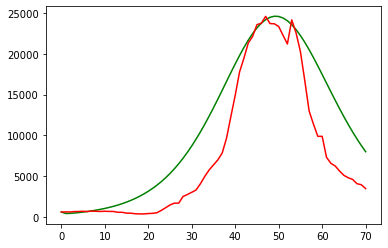

Average error: 3427.8186782271637


In [26]:
sh_seir, sh_pred = show_predict(sh_data, all_sh, sh_end, sh_start_day, S0, I0, mu=1, beta=1, gamma=0.778)

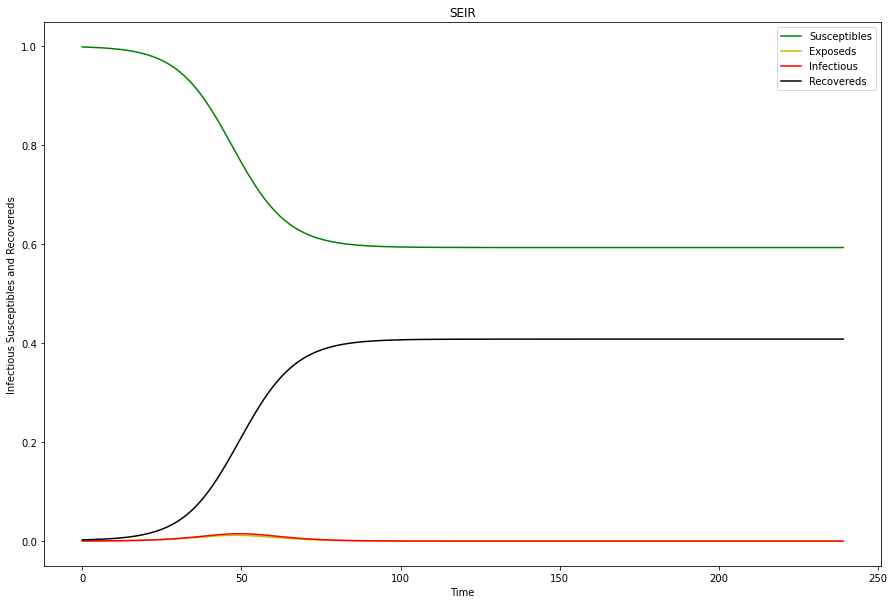

In [13]:
sh_seir.show(sh_pred)